### 逻辑回归 Logistic Regression

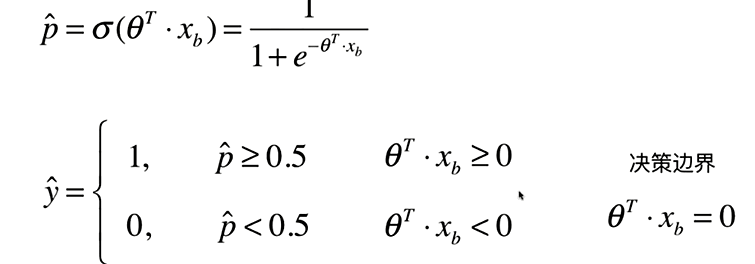

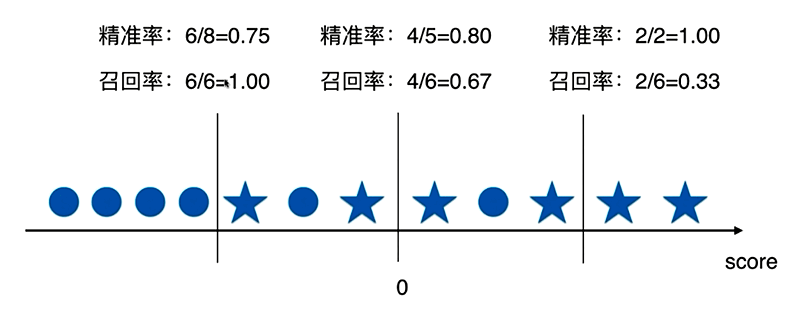

### 代码实现准确率和召回率的平衡

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from  sklearn import datasets

In [3]:
digits = datasets.load_digits()
X = digits.data
y = digits.target.copy()

y[digits.target == 9] = 1
y[digits.target != 9] = 0

In [4]:
from sklearn.model_selection import train_test_split

X_train,X_test, y_train,y_test = train_test_split(X, y)

In [5]:
from sklearn.linear_model import LogisticRegression

In [6]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_predict = log_reg.predict(X_test)

In [7]:
from sklearn.metrics import f1_score
f1_score(y_test, y_predict)

0.88

In [8]:
from sklearn.metrics import precision_score
precision_score(y_test, y_predict)

0.8301886792452831

In [9]:
from sklearn.metrics import recall_score
recall_score(y_test, y_predict)

0.9361702127659575

In [10]:
log_reg.decision_function(X_test)

array([-42.60210062,  -2.74075391, -35.57327319, -20.59914656,
       -31.50013334,   7.86529751,   3.30418676,  -9.68609597,
        -5.85820464, -28.37781478, -21.06315274, -38.22053607,
       -16.02692779,   2.30480313, -39.81234034,   6.03493598,
       -28.21534446, -27.00274624, -16.13636555, -27.56120612,
       -19.38303773, -10.89125498,  -4.24514925, -15.66132566,
       -15.66665682,  -7.9278091 ,  -0.97253937, -41.85001795,
       -14.33239189, -22.44465809, -10.80788884, -34.92523997,
       -34.52605302, -17.28545163, -35.2182797 ,  -5.05158461,
         5.43092481,  -5.81495916, -22.7627779 , -11.56414204,
        -4.47829954, -24.17649542,   1.22527933, -24.67294409,
        -6.46413986, -15.87077588,   5.88707938, -14.15392438,
       -39.09075555, -24.26701644,   7.10658856, -36.38896108,
       -36.94163129, -14.15689744,  -3.49187867, -14.390441  ,
       -35.13321002, -22.68656692, -26.4982263 , -17.58053856,
        -9.25062196,  -1.26642743,   0.57828206, -35.64

这些数就是score值可以通过这个方式

In [11]:
log_reg.decision_function(X_test)[:10]

array([-42.60210062,  -2.74075391, -35.57327319, -20.59914656,
       -31.50013334,   7.86529751,   3.30418676,  -9.68609597,
        -5.85820464, -28.37781478])

In [12]:
# 对其进行验证
log_reg.predict(X_test)[:10]

array([0, 0, 0, 0, 0, 1, 1, 0, 0, 0])

这里是以0为基准进行分类的

In [13]:
decision_score = log_reg.decision_function(X_test)

In [14]:
np.min(decision_score)

-69.28968120732242

In [15]:
np.max(decision_score)

15.919411085480158

将大于5的分类为1，小于5的分类为0

In [16]:
y_predict_2 = np.array(decision_score >= 5, dtype='int')

In [17]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_predict_2)

array([[403,   0],
       [ 17,  30]], dtype=int64)

In [18]:
recall_score(y_test, y_predict_2)

0.6382978723404256

将预值调低

In [19]:
y_predict_3 = np.array(decision_score >= -5, dtype='int')
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_predict_3)

array([[362,  41],
       [  1,  46]], dtype=int64)

In [20]:
recall_score(y_test, y_predict_3)

0.9787234042553191

In [21]:
precision_score(y_test, y_predict_3)

0.5287356321839081